# NREFT Spectra

Here, we calculate the spectra for 18 different operators and a range of target nuclei.

In [31]:
%matplotlib inline

In [34]:
from WIMpy import DMUtils as DMU

#We'll also import some useful libraries
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

font = {'family' : 'sans-serif',
        'size'   : 18}

mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rc('font', **font)

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True



from tqdm import tqdm

from scipy.integrate import quad

from matplotlib.ticker import MultipleLocator


### Target nuclei

Let's specify the target nuclei we're interested in...

In [35]:
targets = ["Xenon", "Argon", "Germanium", "C3F8"]

nuclei_Xe = ["Xe128", "Xe129", "Xe130", "Xe131", "Xe132", "Xe134", "Xe136"]
nuclei_Ar = ["Ar40",]
nuclei_C3F8 = ["C12", "F19"]
nuclei_Ge = ["Ge70", "Ge72", "Ge73", "Ge74", "Ge76"]

nuclei_vals = dict(zip(targets, [nuclei_Xe, nuclei_Ar, nuclei_Ge, nuclei_C3F8]))

#Load in the list of nuclear spins, atomic masses and mass fractions
nuclei_list = np.loadtxt("../WIMpy/Nuclei.txt", usecols=(0,), dtype=str)
frac_list = np.loadtxt("../WIMpy/Nuclei.txt", usecols=(3,))

frac_vals = dict(zip(nuclei_list, frac_list))

### Calculating the recoil rate

Let's define a function for calculating the recoil spectrum for a given target:

In [56]:
E_list = np.linspace(0.001, 100, 100)
m_x = 50.0 #GeV

def calcSpectrum(target, operator, spin):
    cp = np.zeros(20)
    cn = np.zeros(20)
    
    #Assume isoscalar (cp = cn) interactions
    cp[operator-1] = 1.0
    cn[operator-1] = 1.0
    
    dRdE = np.zeros_like(E_list)
    
    if (target == "C3F8"):
        #Weight by mass fractions of constituents
        dRdE = 0.1915*DMU.dRdE_NREFT(E_list, m_x, cp, cn, "C12", j_x = spin)\
            + 0.8085*DMU.dRdE_NREFT(E_list, m_x, cp, cn, "F19", j_x = spin)
    
    else:
        nuclei = nuclei_vals[target]
        for nuc in nuclei:
             dRdE += frac_vals[nuc]*DMU.dRdE_NREFT(E_list, m_x, cp, cn, nuc, j_x = spin)
        
    return dRdE

### Plotting a single recoil rate

Adding the recoil rate to a given plot:

In [67]:
def plotSpectrum(target, operator, spin, ax, label, color):
    dRdE = calcSpectrum(target, operator, spin)
    
    #Normalise to 1 event
    tot = np.trapz(dRdE,E_list)
    
    #If the rate is zero, set the integral to 1 to avoid divide-by-zero warnings
    if (tot == 0.0):
        tot = 1.0
    dRdE_norm = dRdE/tot
    
    ax.plot(E_list, dRdE_norm, label=label, color=color, lw=1.5)
    

### Plotting the recoil rate for a given operator (and all targets)

In [68]:
def plotOperator(ax, operator, spin, plotLegend=False):

    ax.set_title(r"Operator $\mathcal{O}_{" + str(operator) + "}$",fontsize=14)
    
    colors = ['r','b','g', 'c']
    
    for tar, col in zip(targets, colors):
        plotSpectrum(tar, operator, spin, ax, label=tar, color=col)
    
    ax.set_xlabel(r'$E_R \,\,\mathrm{[keV]}$')
    ax.set_ylabel(r'$\mathrm{d}R/\mathrm{d}E_R \,\,\mathrm{[1/keV]}$')
    #ax.set_ylabel(r'$\mathrm{d}R/\mathrm{d}E_R \,\,\mathrm{[arb. units]}$')
    
    if (plotLegend):
        ax.legend(fancybox=True, fontsize=12)
    
    #ax.yaxis.set_major_locator(MultipleLocator(0.01))
    ax.set_ylim(0, 0.06)

### Actually doing the plotting...

#### Spin-0 Dark Matter

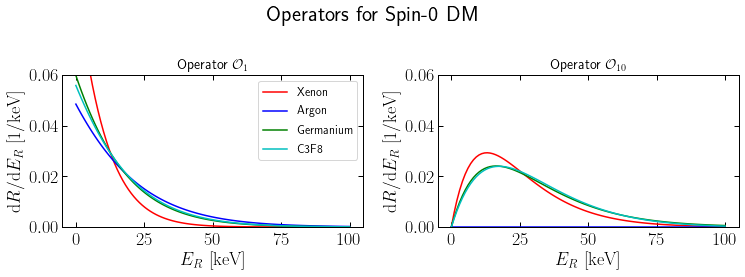

In [71]:
f,ax = plt.subplots(1,2,figsize=(10.7,4))

#f,ax = plt.subplots(2,2,figsize=(10,7))
plotOperator(ax.flatten()[0],1, spin = 0, plotLegend=True)

for i,op in enumerate([10,]):
    plotOperator(ax.flatten()[i+1],op, spin = 0)
    
plt.suptitle("Operators for Spin-0 DM")
plt.tight_layout()

plt.savefig("../plots/Spectra_Spin0_mx=" + str(int(m_x))+ "GeV.pdf", bbox_inches="tight")
plt.show()

#### Spin-1/2 Dark Matter

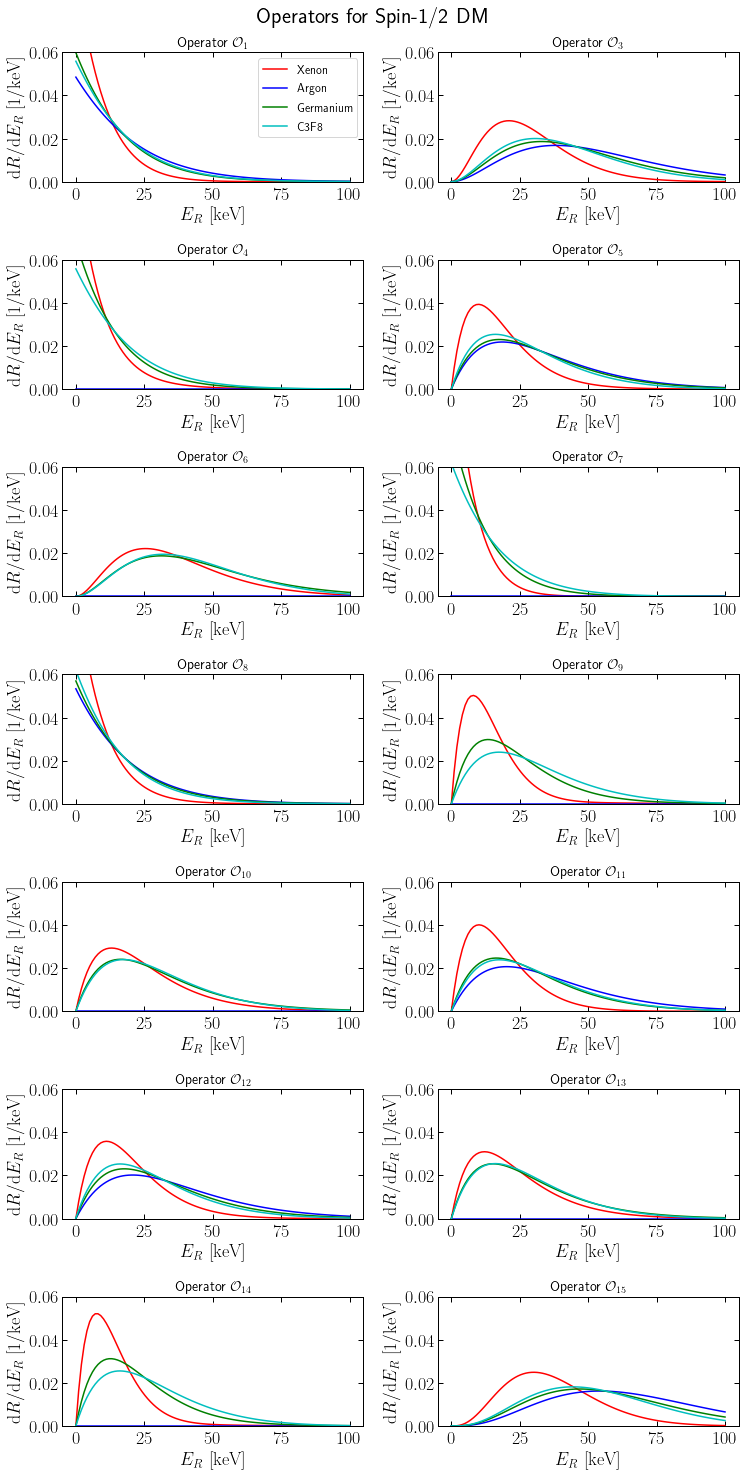

In [72]:
f,ax = plt.subplots(7,2,figsize=(10.7,3*7))

#f,ax = plt.subplots(2,2,figsize=(10,7))
plotOperator(ax.flatten()[0],1, spin=1/2, plotLegend=True)

for i,op in enumerate([3,4,5,6,7,8,9,10,11,12,13,14,15]):
    plotOperator(ax.flatten()[i+1],op, spin=1/2)
    
plt.suptitle("Operators for Spin-1/2 DM")
plt.tight_layout()
plt.savefig("../plots/Spectra_Spin0.5_mx=" + str(int(m_x))+ "GeV.pdf", bbox_inches="tight")
plt.show()

#### Spin-1 Dark Matter

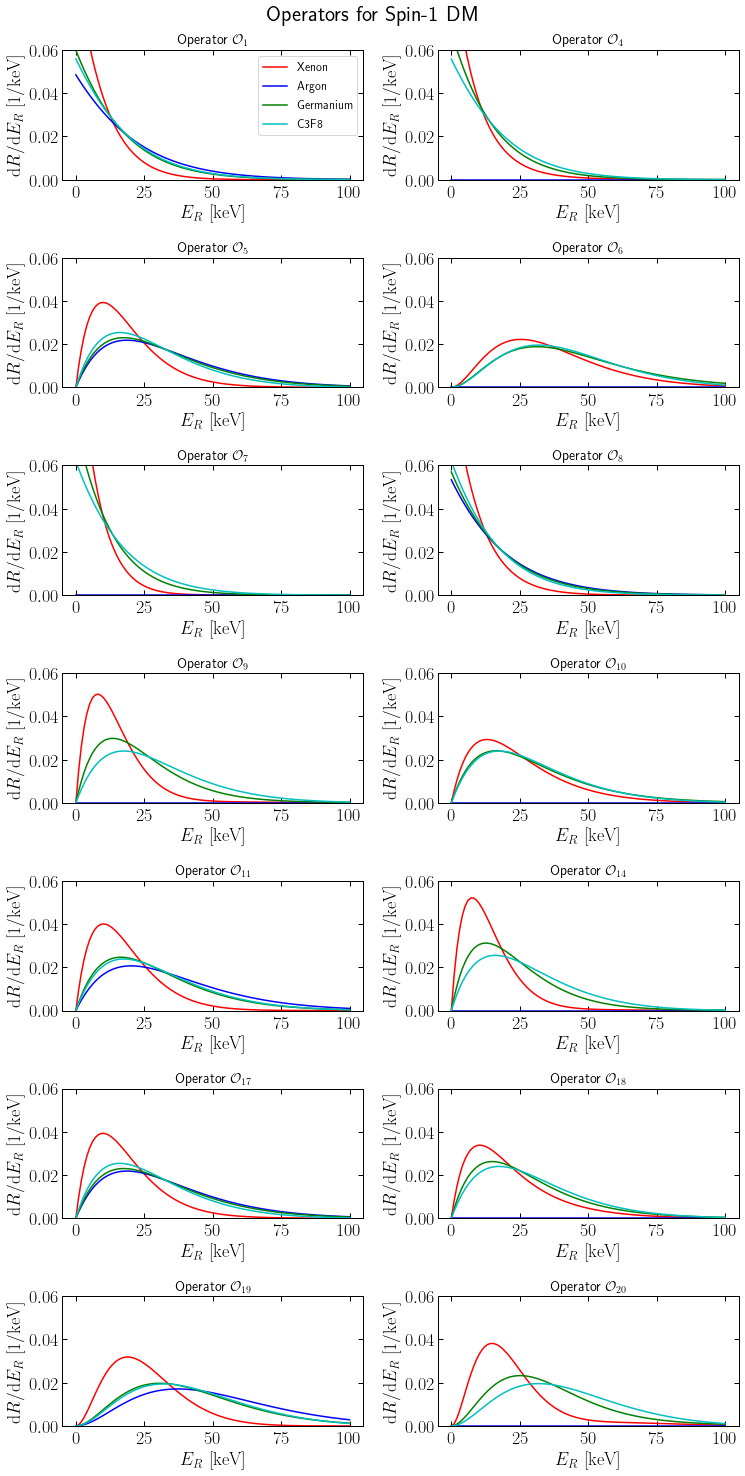

In [73]:
f,ax = plt.subplots(7,2,figsize=(10.7,3*7))

#f,ax = plt.subplots(2,2,figsize=(10,7))
plotOperator(ax.flatten()[0],1, spin=1, plotLegend=True)

for i,op in enumerate([4, 5, 6, 7, 8, 9, 10, 11, 14, 17, 18, 19, 20]):
    plotOperator(ax.flatten()[i+1],op, spin=1)
    
plt.suptitle("Operators for Spin-1 DM")
plt.tight_layout()
plt.savefig("../plots/Spectra_Spin1_mx=" + str(int(m_x))+ "GeV.pdf", bbox_inches="tight")
plt.show()

## Comparing 2 operators

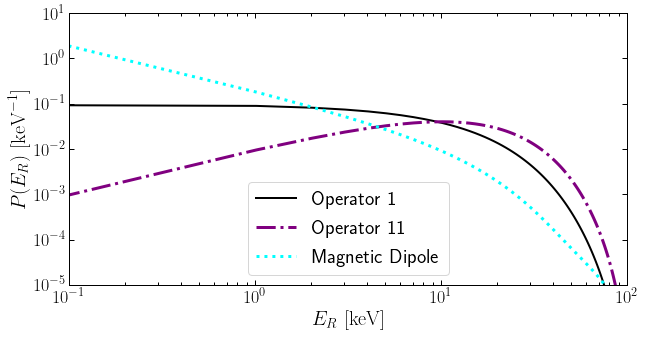

In [75]:
fig = plt.figure(figsize=(10,5))

dRdE1 = calcSpectrum("Xenon", 1, 1/2)
dRdE11 = calcSpectrum("Xenon", 11, 1/2)
dRdEmag = DMU.dRdE_magnetic(E_list, 50.0, 1.0, "Xe131")

dPdE1 = dRdE1/np.trapz(dRdE1, E_list)
dPdE11 = dRdE11/np.trapz(dRdE11, E_list)
dPdEmag = dRdEmag/np.trapz(dRdEmag, E_list)

plt.plot(E_list, dPdE1, label="Operator 1", color='k', lw=2)
plt.plot(E_list, dPdE11, label = "Operator 11", color='purple', linestyle='-.', lw=3)
plt.plot(E_list, 100*dPdEmag, label = "Magnetic Dipole", color='cyan', linestyle=':', lw=3)

plt.xlabel(r'$E_R \,\,\mathrm{[keV]}$', fontsize=20)
plt.ylabel(r'$P(E_R) \,\,[\mathrm{keV}^{-1}]$', fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.ylim(1e-5, 10)
plt.xlim(1e-1, 1e2)

plt.yticks(np.geomspace(1e-5, 10, 7))

plt.legend(fontsize=20, loc='lower center')

plt.savefig("../plots/Operator_Comparison.pdf", bbox_inches='tight')
plt.show()